Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Heart_Disease_Prediction.csv')
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [12]:
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
    if data[col].dtype == "float64":
        print(str(col))
        label=LabelEncoder()
        label=label.fit(data[col])
        data[col]=label.transform(data[col].astype(str))

for col in data.columns:
    if data[col].dtype=="object":
        print(str(col))
        label=LabelEncoder()
        label=label.fit(data[col])
        data[col]=label.transform(data[col].astype(str))

ST depression
Heart Disease


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      270 non-null    int64
 1   Sex                      270 non-null    int64
 2   Chest pain type          270 non-null    int64
 3   BP                       270 non-null    int64
 4   Cholesterol              270 non-null    int64
 5   FBS over 120             270 non-null    int64
 6   EKG results              270 non-null    int64
 7   Max HR                   270 non-null    int64
 8   Exercise angina          270 non-null    int64
 9   ST depression            270 non-null    int64
 10  Slope of ST              270 non-null    int64
 11  Number of vessels fluro  270 non-null    int64
 12  Thallium                 270 non-null    int64
 13  Heart Disease            270 non-null    int32
dtypes: int32(1), int64(13)
memory usage: 28.6 KB


In [14]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.077778,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,9.925926,1.585185,0.670370,4.696296,0.444444
std,9.201052,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,10.168564,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,8.000000,2.000000,0.000000,3.000000,0.000000
75%,60.750000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,16.000000,2.000000,1.000000,7.000000,1.000000
max,80.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,38.000000,3.000000,3.000000,7.000000,1.000000


In [15]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [16]:
#IQR for Cholesterol Column
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1 

# Calculating the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering outliers
outliers = data[(data['Cholesterol'] < lower_bound) | (data['Cholesterol'] > upper_bound)]['Cholesterol']

print('Outliers:')
print(outliers)

Outliers:
1      564
9      407
52     417
181    409
188    394
Name: Cholesterol, dtype: int64


Exploratory Data Analysis

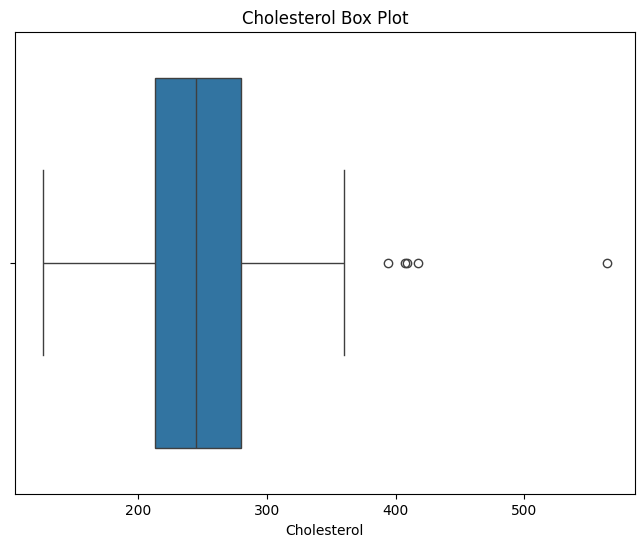

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Cholesterol'])
plt.title('Cholesterol Box Plot')
plt.show()

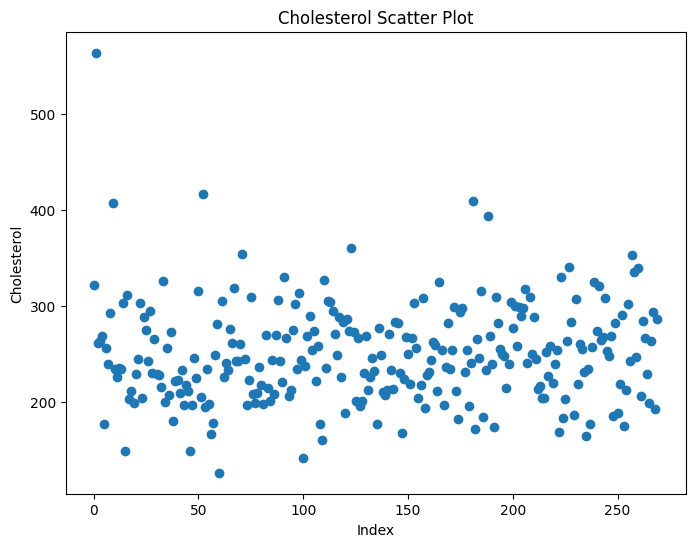

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(x=data.index, y=data['Cholesterol'])
plt.xlabel('Index')
plt.ylabel('Cholesterol')
plt.title('Cholesterol Scatter Plot')
plt.show()

In [20]:
data.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.084770,0.092851,0.296292,0.285092,0.125882,0.144758,-0.348452,0.091004,0.213865,0.175391,0.359950,0.117915,0.222914
Sex,-0.084770,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.108970,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.092851,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.166414,0.136900,0.225890,0.262659,0.417436
BP,0.296292,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.212534,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.285092,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.039512,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.125882,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.019555,0.044076,0.123774,0.049237,-0.016319
EKG results,0.144758,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.123992,0.160614,0.114368,0.007337,0.182091
Max HR,-0.348452,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.361430,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.091004,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.284574,0.255908,0.153347,0.321449,0.419303
ST depression,0.213865,0.108970,0.166414,0.212534,0.039512,-0.019555,0.123992,-0.361430,0.284574,1.000000,0.611522,0.248426,0.324756,0.423645


<Axes: >

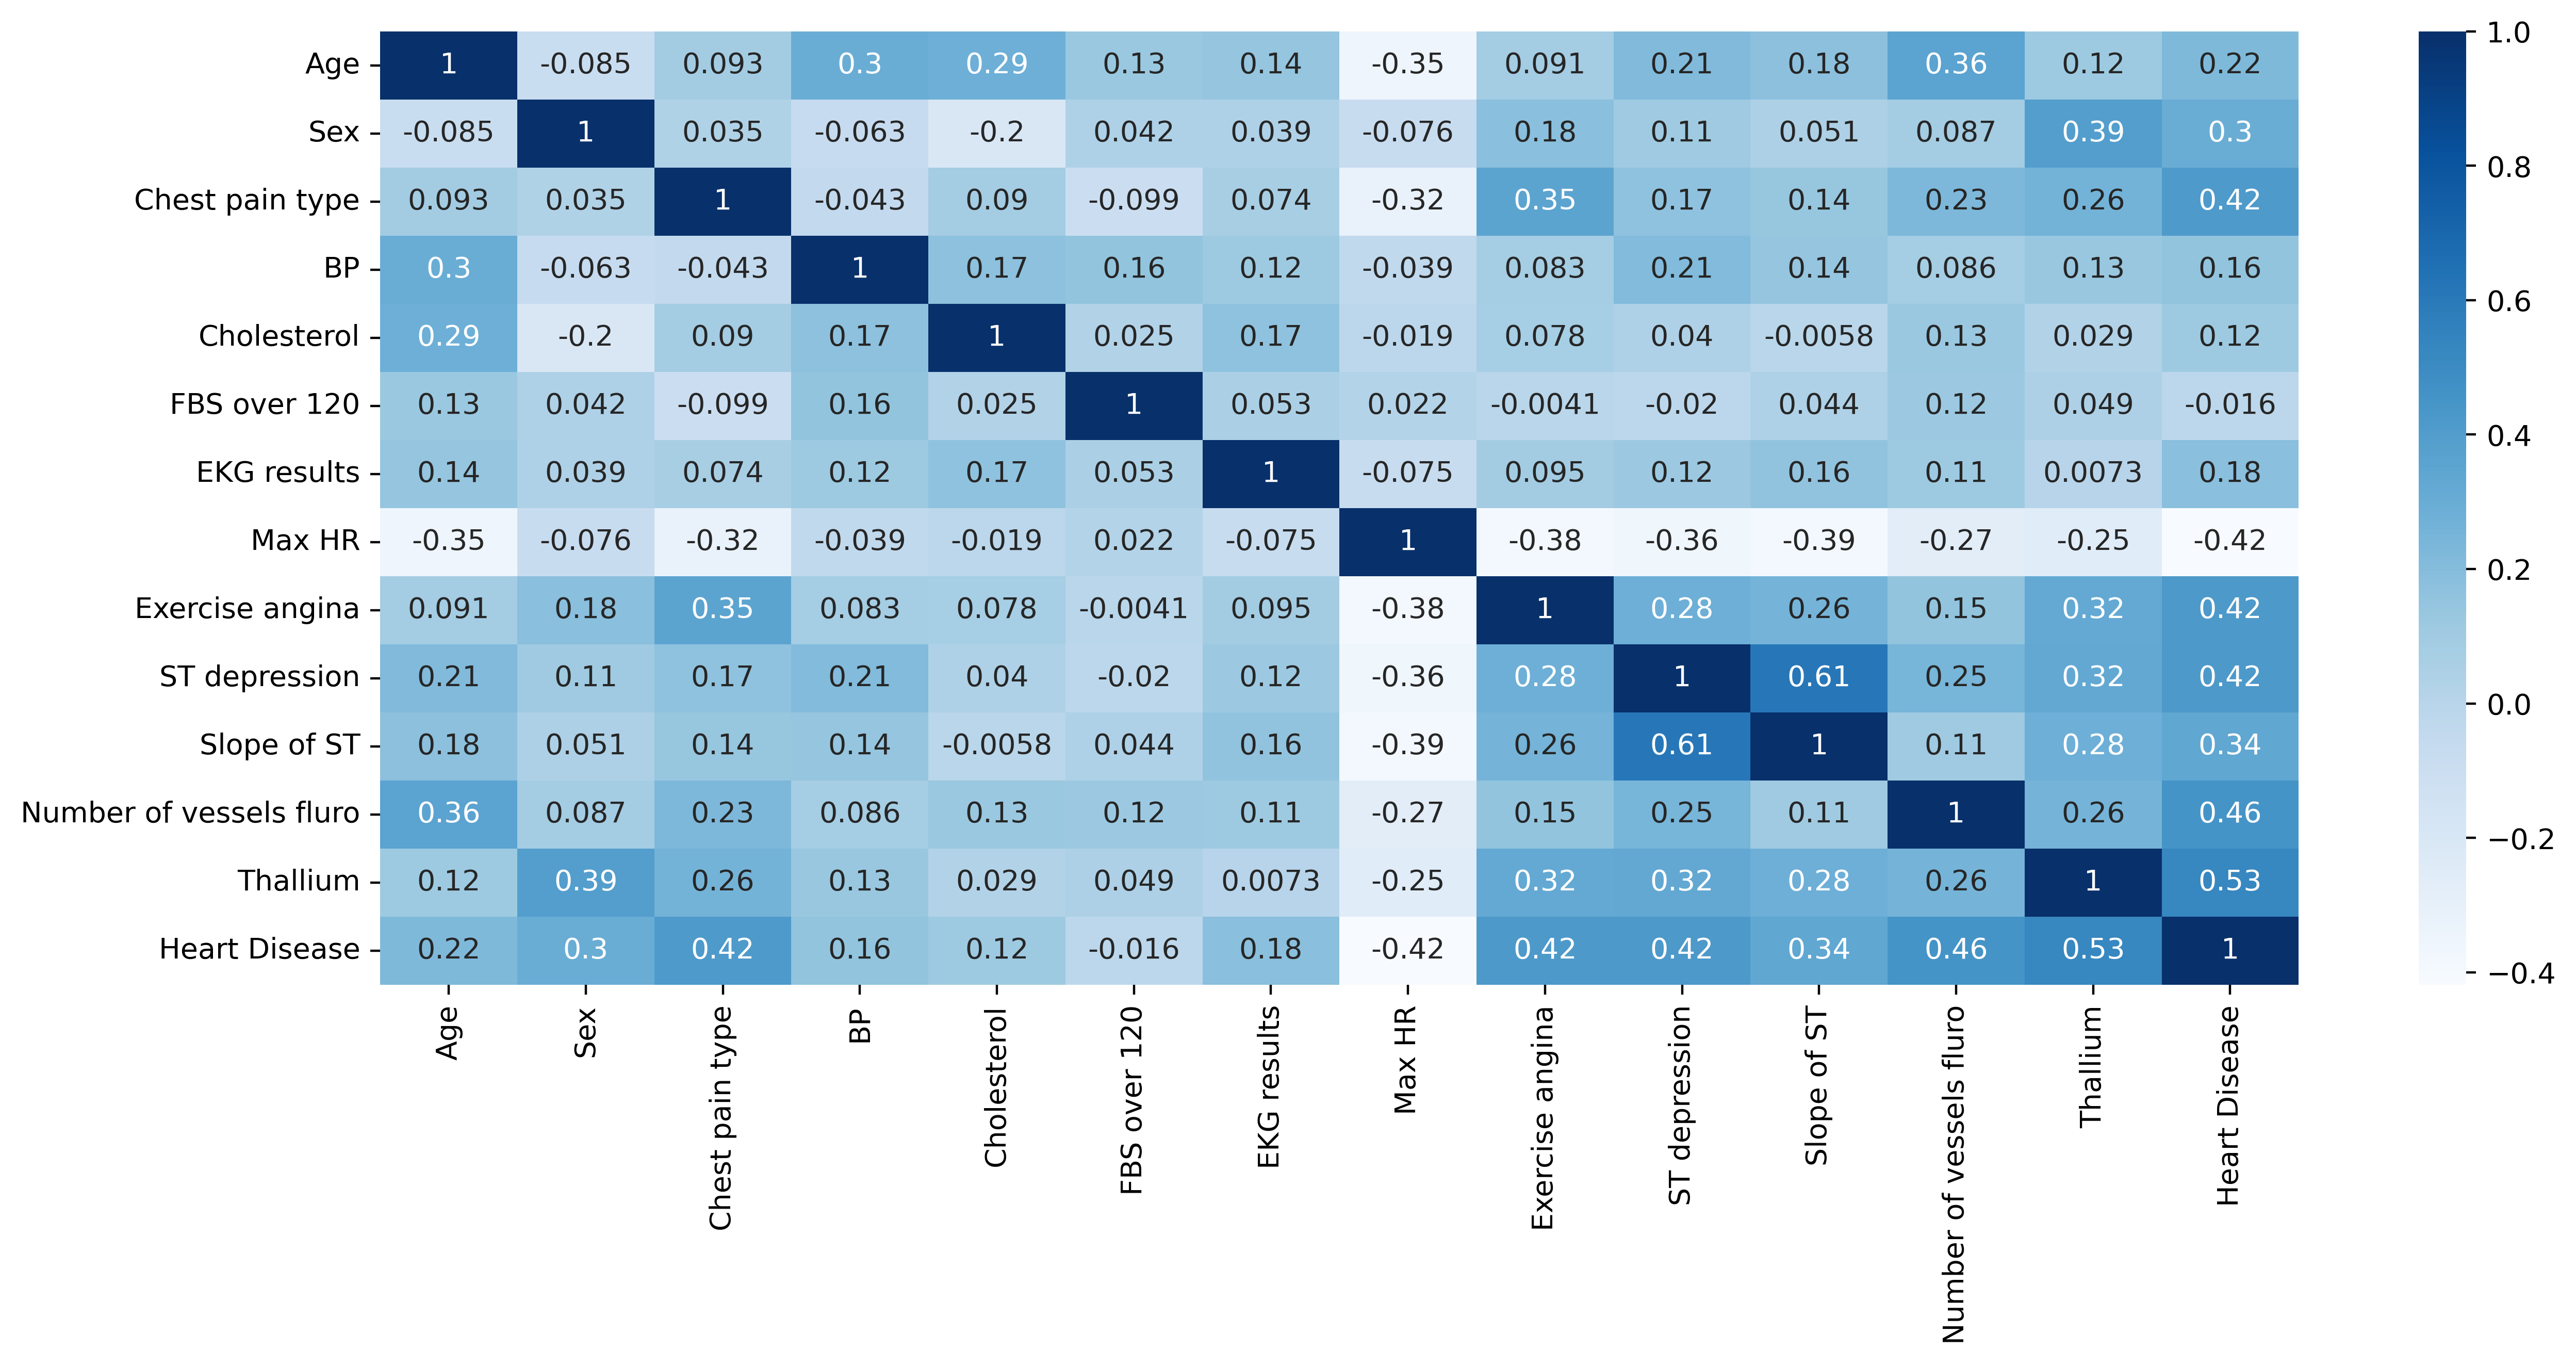

In [23]:
plt.figure(figsize=(15,6), dpi=400)
sns.heatmap(data.corr(),annot=True,cmap="Blues")

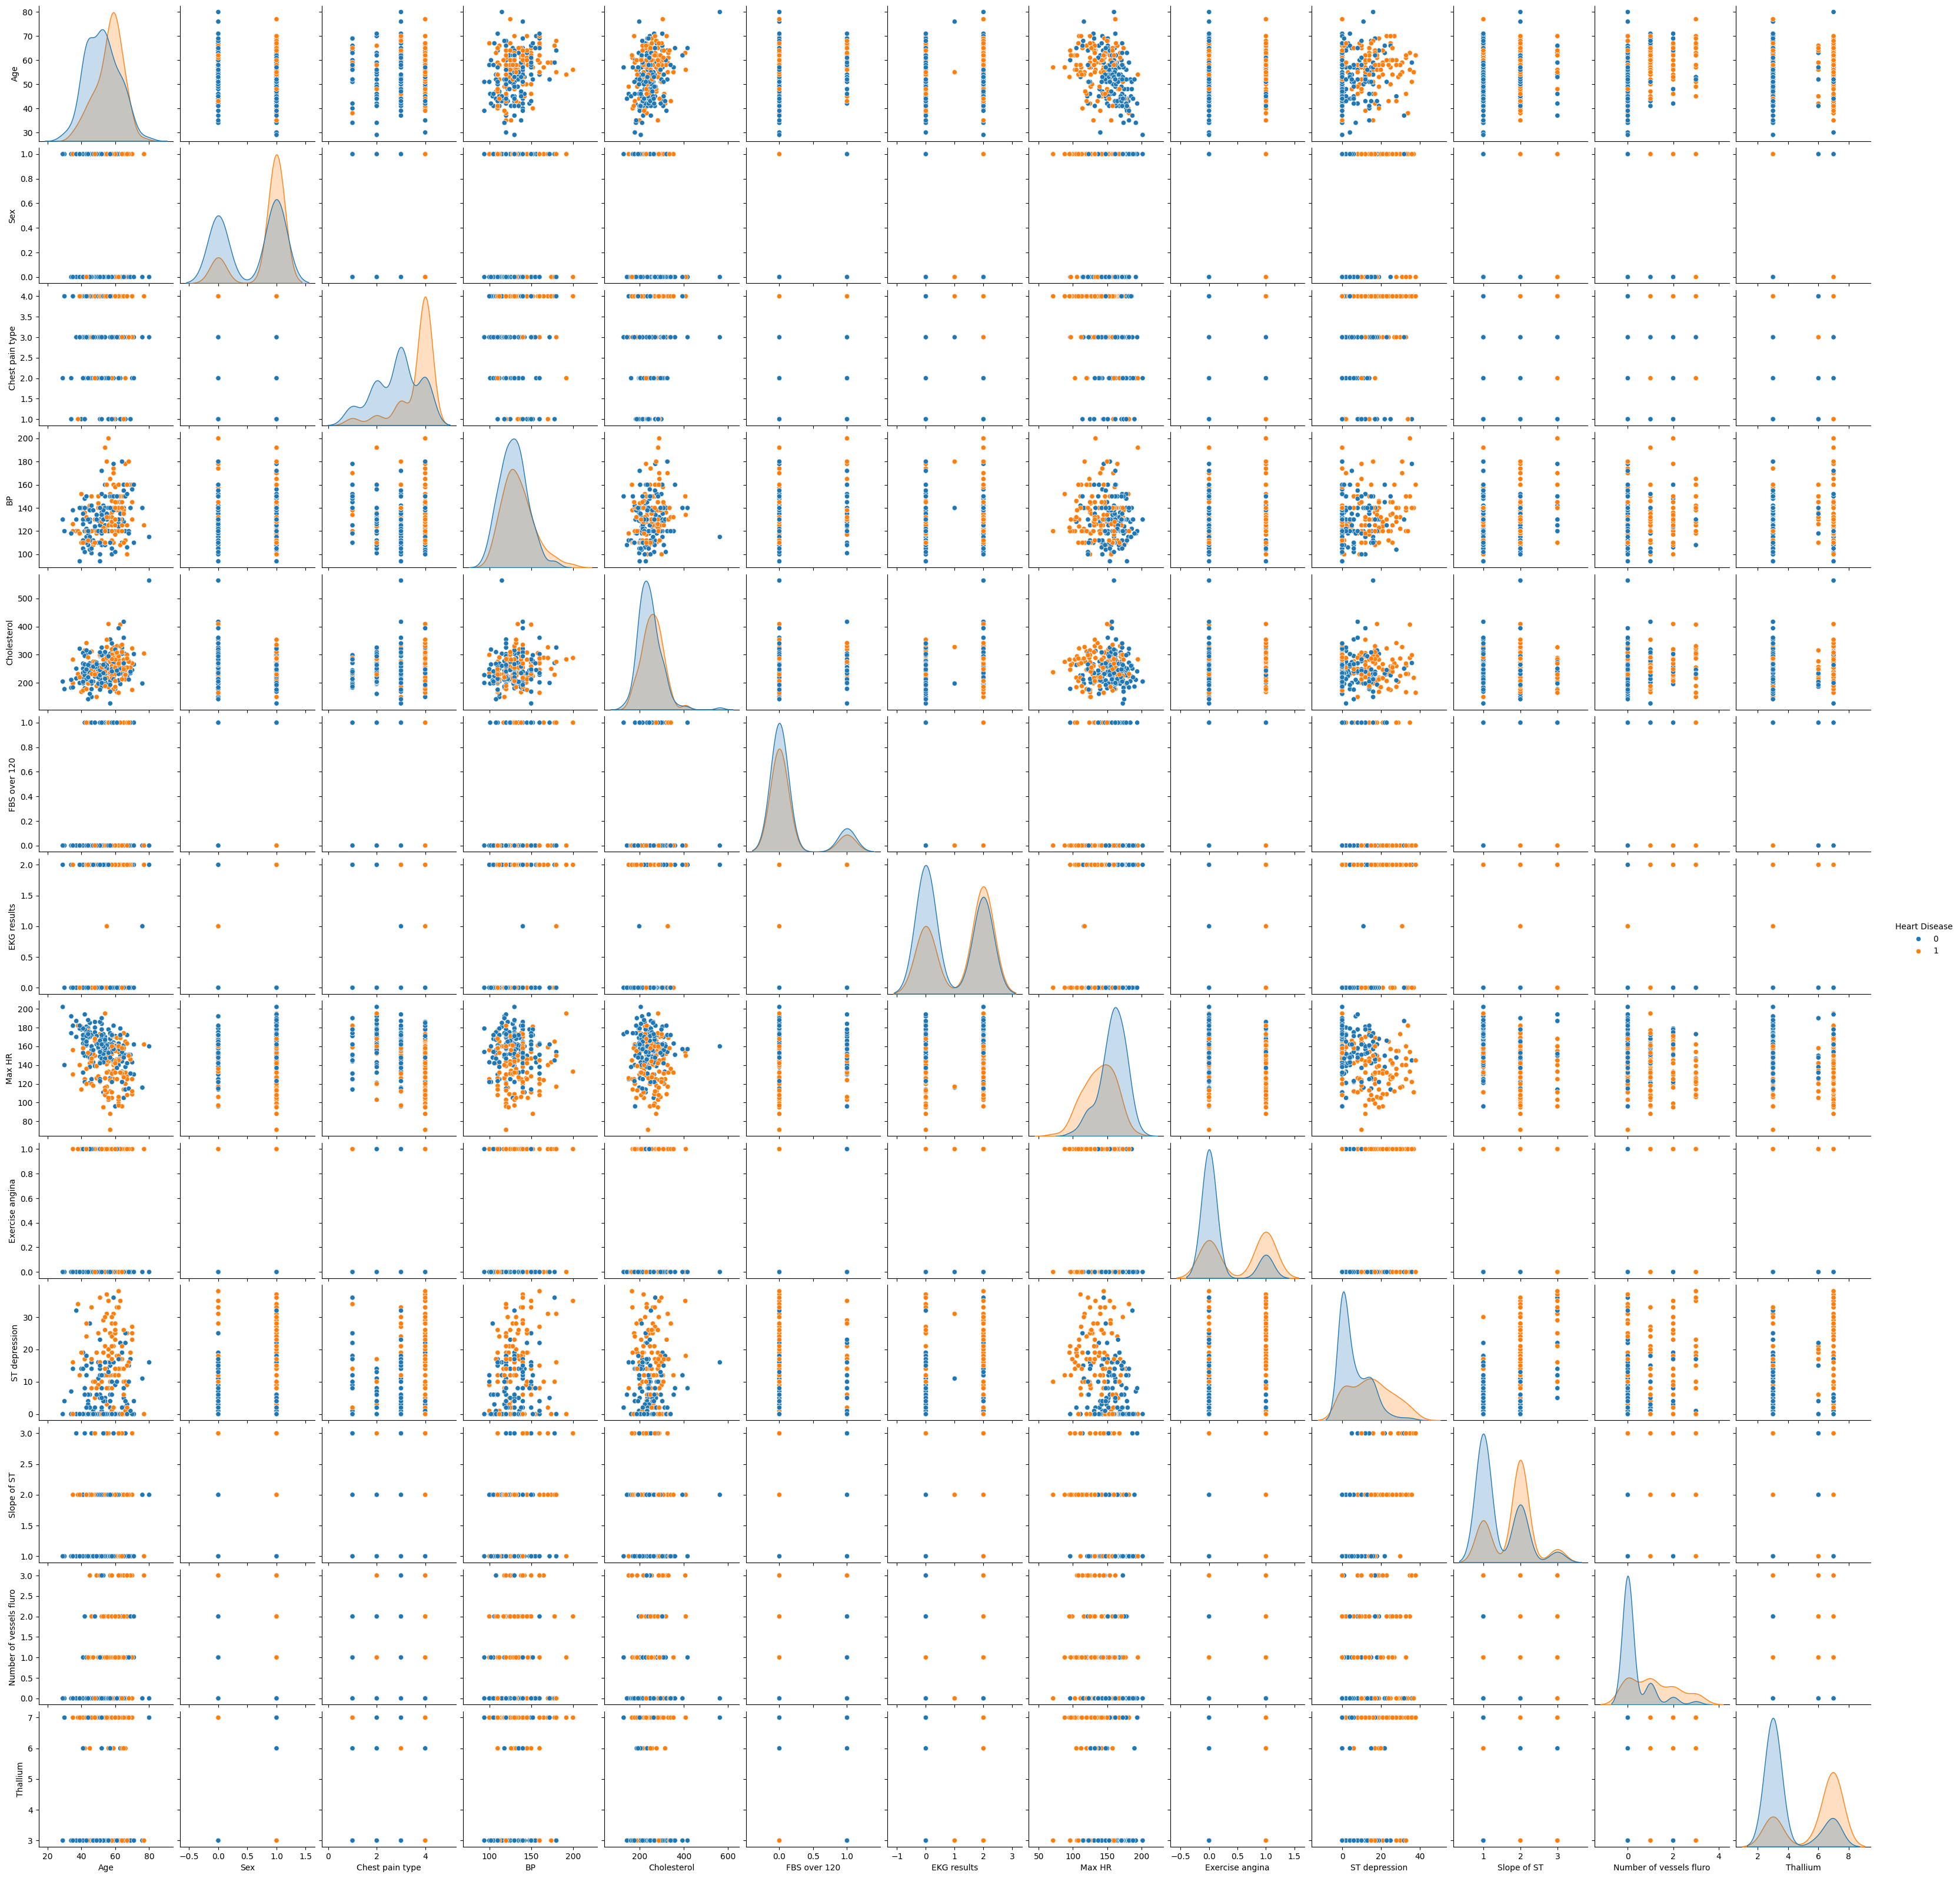

In [24]:
sns.pairplot(data, hue='Heart Disease')

<Axes: xlabel='Cholesterol', ylabel='Count'>

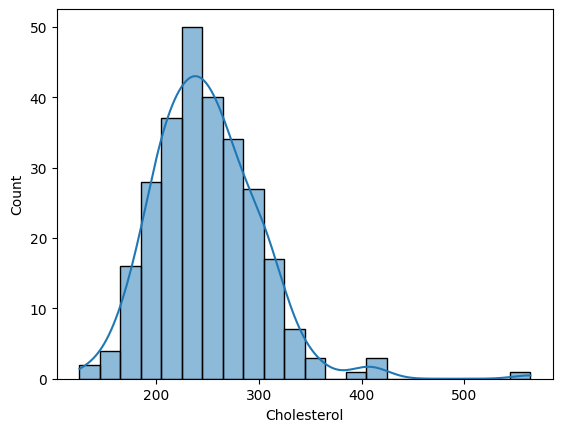

In [27]:
sns.histplot(data=data['Cholesterol'], kde=True)

<Axes: xlabel='ST depression', ylabel='Count'>

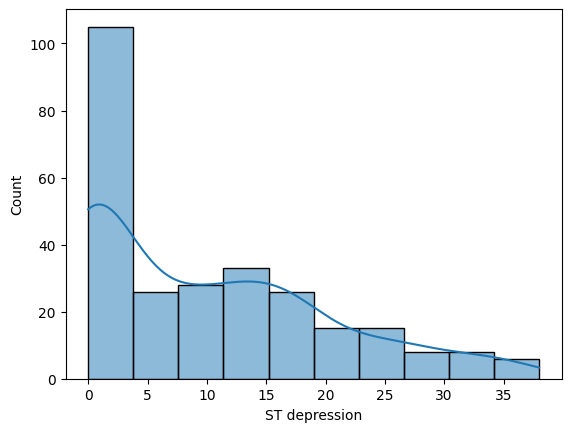

In [28]:
sns.histplot(data=data['ST depression'], kde=True)

<Axes: xlabel='Chest pain type', ylabel='Count'>

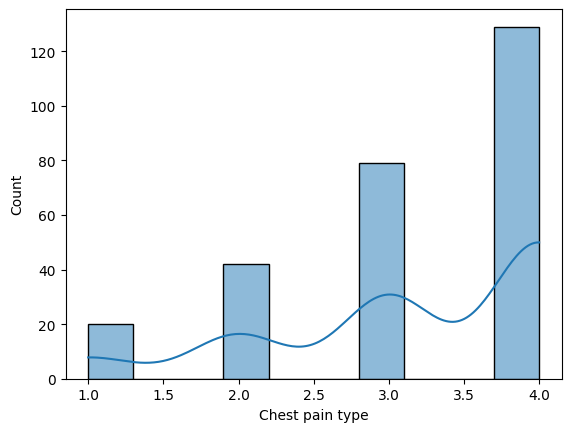

In [29]:
sns.histplot(data=data['Chest pain type'], kde=True)

<Axes: xlabel='Heart Disease', ylabel='count'>

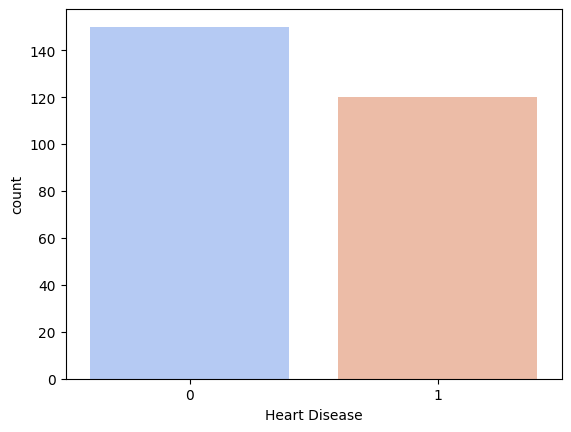

In [35]:
sns.countplot(x=data['Heart Disease'], palette='coolwarm')

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [39]:
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

log_mod = sm.Logit(y_train, X_train).fit()
log_mod.summary()

Optimization terminated successfully.
         Current function value: 0.367238
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Heart Disease   No. Observations:                  216
Model:                          Logit   Df Residuals:                      203
Method:                           MLE   Df Model:                           12
Date:                Tue, 25 Jun 2024   Pseudo R-squ.:                  0.4675
Time:                        18:02:24   Log-Likelihood:                -79.323
converged:                       True   LL-Null:                       -148.97
Covariance Type:            nonrobust   LLR p-value:                 8.327e-24
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0401      0.025     -1.622      0.105      -0.089       0.008
Sex                         1.2437      0.529      2.351      0.019       0.207       2.280
Chest pain type             0.3544      0.207      1.713      0.087      -0.051       0.760
BP                          0.0114      0.012      0.984      0.325      -0.011       0.034
Cholesterol                 0.0041      0.005      0.858      0.391      -0.005       0.013
FBS over 120               -0.5492      0.603     -0.911      0.362      -1.731       0.633
EKG results                 0.3843      0.210      1.829      0.067      -0.028       0.796
Max HR                     -0.0390      0.009     -4.395      0.000      -0.056      -0.022
Exercise angina             0.6839      0.453      1.508      0.131      -0.205       1.573
ST depression               0.0367      0.025      1.454      0.146      -0.013       0.086
Slope of ST                 0.1897      0.396      0.478      0.632      -0.587       0.967
Number of vessels fluro     0.9635      0.274      3.515      0.000       0.426       1.501
Thallium                    0.3069      0.115      2.670      0.008       0.082       0.532
===========================================================================================
"""

Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

log_modsk = LogisticRegression(solver='liblinear').fit(X_train, y_train)

print(f"Sabit Katsayı: {log_modsk.intercept_}")
print(f"Katsayılar: {log_modsk.coef_}")

Sabit Katsayı: [-0.86973168]
Katsayılar: [[-0.03311758  1.01295987  0.37858741  0.01096707  0.00419593 -0.39029335
   0.37823793 -0.03524555  0.58982974  0.03967856  0.17310026  0.87422017
   0.33034439]]


In [41]:
fits = log_modsk.predict(X)
fits[0:10]

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('confusion_matrix:')
print(confusion_matrix(y, fits))
print('\n')
print(f'accuracy_score:{accuracy_score(y, fits)}')

confusion_matrix:
[[133  17]
 [ 23  97]]


accuracy_score:0.8518518518518519


In [49]:
proba = log_modsk.predict_proba(X)
proba[0:10]

array([[0.01977493, 0.98022507],
       [0.58540544, 0.41459456],
       [0.69658452, 0.30341548],
       [0.07491825, 0.92508175],
       [0.48969902, 0.51030098],
       [0.3934994 , 0.6065006 ],
       [0.15705861, 0.84294139],
       [0.0942121 , 0.9057879 ],
       [0.1107359 , 0.8892641 ],
       [0.01965262, 0.98034738]])

Area Under Curve(AUC)

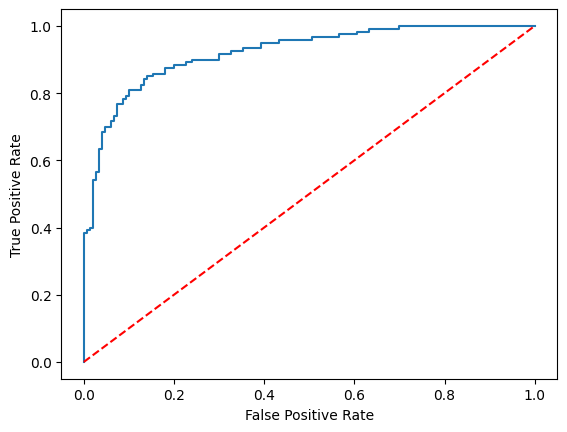

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, treshold_val = roc_curve(y, proba[:, 1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve
aucs = roc_auc_score(y, fits)
print(f'accuracy:{aucs}')

accuracy:0.8475


Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
naiveModel = GaussianNB().fit(X_train, y_train)
preds = naiveModel.predict(X_test)
print(f'accuracy:{accuracy_score(y_test, preds)}')

accuracy:0.8333333333333334


KNN(K-Nearest Neighbour)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(X_train, y_train)
preds = knn_model.predict(X_test)
print(f'accuracy:{accuracy_score(y_test, preds)}')

accuracy:0.7592592592592593


In [59]:
from sklearn.model_selection import GridSearchCV
knn_optims = {"n_neighbors": np.arange(1,40)}
arg = KNeighborsClassifier()
knn_cv = GridSearchCV(arg, knn_optims, cv = 5).fit(X_train, y_train)
print(f"Best parameters : {knn_cv.best_params_}")
print(f"Best score : {knn_cv.best_score_}")


Best parameters : {'n_neighbors': 8}
Best score : 0.6987315010570824


Support Vector Model(SVM)

In [61]:
from sklearn.svm import SVC
svc_model = SVC(kernel = "linear").fit(X_train, y_train)
preds = svc_model.predict(X_test)
print(f'accuracy score:{accuracy_score(y_test, preds)}')

accuracy score:0.8888888888888888


In [63]:
svc_optims = {"C": np.arange(1,13)}
svc = SVC(kernel = "linear")
svc_cv = GridSearchCV(svc, svc_optims, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)
print(f"Best parameters: {svc_cv.best_params_}")
print(f"Best score: {svc_cv.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 2}
Best score: 0.8332980972515858


In [64]:
svc_best = SVC(kernel = "linear", C = 2)
svc_bestModel = svc_best.fit(X_train, y_train)
predsBest = svc_bestModel.predict(X_test)
print(f'accurcy score: {accuracy_score(y_test, predsBest)}')

accurcy score: 0.8703703703703703


Artificial Neural Networks (ANNs)

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_z = scaler.transform(X_train)
X_test_z = scaler.transform(X_test)

In [68]:
import warnings
warnings.filterwarnings('ignore')

mlp_model = MLPClassifier().fit(X_train_z, y_train)
mlp_pred = mlp_model.predict(X_test_z)
print(f'accuracy score: {accuracy_score(y_test, mlp_pred)}')

accuracy score: 0.8888888888888888


In [72]:
mlp_params = {"alpha":[0.1,0.01,0.001],"hidden_layer_sizes":[(8,8,8),(32,32,32),(64,64,64),
                                                             (8,6),(4,6)],
              "solver":["lbfgs","adam","sgd"],"activation":["relu","logistic"]}
mlp = MLPClassifier()
from sklearn.model_selection import GridSearchCV
mlp_cv = GridSearchCV(mlp, mlp_params, cv=10, n_jobs=-1, verbose=2).fit(X_train_z, y_train)

mlp_cv.best_params_

Fitting 10 folds for each of 90 candidates, totalling 900 fits


{'activation': 'logistic',
 'alpha': 0.01,
 'hidden_layer_sizes': (32, 32, 32),
 'solver': 'adam'}

In [73]:
mlp_best = MLPClassifier(activation="logistic",alpha=0.01,solver="adam",
                         hidden_layer_sizes=(32,32,32)).fit(X_train_z,y_train)
mlp_pred = mlp_best.predict(X_test_z)
print(f'accuracy score: {accuracy_score(y_test, mlp_pred)}')

accuracy score: 0.8703703703703703


Classification and Regression Tree(CART)

In [75]:
from sklearn.tree import DecisionTreeClassifier

cart_model = DecisionTreeClassifier().fit(X_train, y_train)
pred_cart = cart_model.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test, pred_cart)}')

accuracy score: 0.7962962962962963


In [79]:
# MODEL OPTIMIZATION
cart_params = {"max_depth":list(range(1,10)),"min_samples_split":list(range(2,60))}
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart,cart_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)
cart_cv.best_params_

Fitting 10 folds for each of 522 candidates, totalling 5220 fits


{'max_depth': 6, 'min_samples_split': 25}

In [80]:
cart_best=DecisionTreeClassifier(max_depth=6, min_samples_split=25).fit(X_train,y_train)
cart_preds_best = cart_best.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test,cart_preds_best)}')

accuracy score: 0.8148148148148148


Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
preds_rf = rf_model.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test, preds_rf)}')

accuracy score: 0.8888888888888888


In [85]:
# MODEL OPTIMIZATION
rf = RandomForestClassifier()
rf_params = {"max_depth":[2,5,8,10],"n_estimators":[10,100,200,600],
             "min_samples_split":[2,8,10]}
rf_cv = GridSearchCV(rf,rf_params, n_jobs=-1,verbose=2).fit(X_train,y_train)
rf_cv.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'max_depth': 2, 'min_samples_split': 8, 'n_estimators': 100}

In [88]:
rf_best = RandomForestClassifier(max_depth=2, n_estimators=100, min_samples_split=8).fit(X_train, y_train)
preds_rf_best=rf_best.predict(X_test)
print(f'accuray score: {accuracy_score(y_test, preds_rf_best)}')

accuray score: 0.9074074074074074


Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier().fit(X_train, y_train)
pred_gb = gb_model.predict(X_test)
print(f"accuracy score: {accuracy_score(y_test, pred_gb)}")

accuracy score: 0.8333333333333334


In [90]:
gb_params = {"learning_rate":[0.001,0.01,0.05,0.1] , "n_estimators":[50,100,150,200], "max_depth":[3,8,10], "min_samples_split":[2,8,10]}
gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, gb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gb_cv.best_params_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 150}

In [92]:
gb_best = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=150).fit(X_train, y_train)
pred_gb_best = gb_best.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test, pred_gb_best)}')

accuracy score: 0.8333333333333334


XGBoots

In [93]:
from xgboost import XGBRFClassifier
xgb_model = XGBRFClassifier().fit(X_test, y_test)
pred_xgb = xgb_model.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test, pred_xgb)}')

accuracy score: 0.9444444444444444


In [94]:
# Model optimization

xgb_params = {"n_estimators":[10,100,300,1000],"subsample":[0.6,0.75,0.95],
              "max_depth":[3,5,8],"learning_rate":[0.001,0.01,0.05,0.025,0.1],
              "min_sample_split":[2,5,8,10]}
xgb = XGBRFClassifier()
xgb_cv = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
xgb_cv.best_params_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


{'learning_rate': 0.1,
 'max_depth': 8,
 'min_sample_split': 2,
 'n_estimators': 100,
 'subsample': 0.95}

In [95]:
from xgboost import XGBRFClassifier
xgb_model_best = XGBRFClassifier(learning_rate=0.1, max_depth=8, min_sample_split=2, n_estimators=100, subsample=0.95).fit(X_test, y_test)
pred_xgb_best = xgb_model.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test, pred_xgb_best)}')

accuracy score: 0.9444444444444444


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



#Conclusion:

XGBoost: 94.44%  
Random Forest: 90.74%  
SVM (Support Vector Machine): 87.03%  
LogisticRegression: 85.18%  
AUC (Area Under the Curve): 83.33%  
CART (Classification and Regression Tree): 81.48%  
Gradient Boosting: 83.33% (same accuracy as Naive Bayes)  
Naive Bayes: 83.33%  
Artificial Neural Networks: 87.03%  
KNN (K-Nearest Neighbors): 69.87%  
